# MIS-5480 - Group 7 Statistical Analysis & Modeling Project


## Introduction

Summary Here

In [1]:
# Import required packages
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm  # For OLS regression
from statsmodels.formula.api import ols  # For ANOVA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np 
import matplotlib.dates as mdates  # Ensure this is imported

In [2]:
# Load the data into zillow_home_sales_df dataframe

zillow_home_sales_df = pd.read_csv("/Users/tonykioko/ISU/MIS5480/Metro_sales_count_now_uc_sfrcondo_month.csv")

print(zillow_home_sales_df.head(5))
print(zillow_home_sales_df.columns)

   RegionID  SizeRank       RegionName RegionType StateName  2008-02-29  \
0    102001         0    United States    country       NaN    202444.0   
1    394913         1     New York, NY        msa        NY      8671.0   
2    753899         2  Los Angeles, CA        msa        CA      4137.0   
3    394463         3      Chicago, IL        msa        IL      5580.0   
4    394514         4       Dallas, TX        msa        TX      4873.0   

   2008-03-31  2008-04-30  2008-05-31  2008-06-30  ...  2024-01-31  \
0    234240.0    260112.0    286644.0    299878.0  ...    213284.0   
1      9170.0     10219.0     10612.0     11518.0  ...     10433.0   
2      5037.0      6062.0      6871.0      7225.0  ...      4400.0   
3      6918.0      7236.0      7945.0      8783.0  ...      5511.0   
4      5523.0      5988.0      6672.0      6673.0  ...      4207.0   

   2024-02-29  2024-03-31  2024-04-30  2024-05-31  2024-06-30  2024-07-31  \
0    236191.0    284929.0    321190.0    354379.0  

In [3]:
## Data Cleaning
# Check for missing values
missing_values = zillow_home_sales_df.isnull().sum()

print(missing_values)

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    1
Length: 206, dtype: int64


In [4]:
## Data Cleaning
# Reshape the data from wide to long format for time-series analysis
zillow_home_sales_df = zillow_home_sales_df.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], 
    var_name='Date', 
    value_name='HomeValue'
)

print(zillow_home_sales_df.head(5))
print(zillow_home_sales_df.columns)

   RegionID  SizeRank       RegionName RegionType StateName        Date  \
0    102001         0    United States    country       NaN  2008-02-29   
1    394913         1     New York, NY        msa        NY  2008-02-29   
2    753899         2  Los Angeles, CA        msa        CA  2008-02-29   
3    394463         3      Chicago, IL        msa        IL  2008-02-29   
4    394514         4       Dallas, TX        msa        TX  2008-02-29   

   HomeValue  
0   202444.0  
1     8671.0  
2     4137.0  
3     5580.0  
4     4873.0  
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'Date',
       'HomeValue'],
      dtype='object')


In [5]:
## Data Cleaning
# Handle missing values in zillow_home_sales_df
# For simplicity, we'll drop rows with missing values for now

zillow_home_sales_df_cleaned = zillow_home_sales_df.dropna()

# Check if there are any remaining missing values
remaining_missing_values = zillow_home_sales_df_cleaned.isnull().sum()

print(remaining_missing_values)

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
Date          0
HomeValue     0
dtype: int64


In [6]:
## Data Cleaning
# Convert 'Date' to datetime format
zillow_home_sales_df['Date'] = pd.to_datetime(zillow_home_sales_df['Date'])

In [7]:
# Filter and display data for RegionID 102001
region_102001_data = zillow_home_sales_df_cleaned[zillow_home_sales_df_cleaned['RegionID'] == 394913]

# Display the filtered data
print(region_102001_data)

       RegionID  SizeRank    RegionName RegionType StateName        Date  \
1        394913         1  New York, NY        msa        NY  2008-02-29   
95       394913         1  New York, NY        msa        NY  2008-03-31   
189      394913         1  New York, NY        msa        NY  2008-04-30   
283      394913         1  New York, NY        msa        NY  2008-05-31   
377      394913         1  New York, NY        msa        NY  2008-06-30   
...         ...       ...           ...        ...       ...         ...   
18425    394913         1  New York, NY        msa        NY  2024-06-30   
18519    394913         1  New York, NY        msa        NY  2024-07-31   
18613    394913         1  New York, NY        msa        NY  2024-08-31   
18707    394913         1  New York, NY        msa        NY  2024-09-30   
18801    394913         1  New York, NY        msa        NY  2024-10-31   

       HomeValue  
1         8671.0  
95        9170.0  
189      10219.0  
283      10

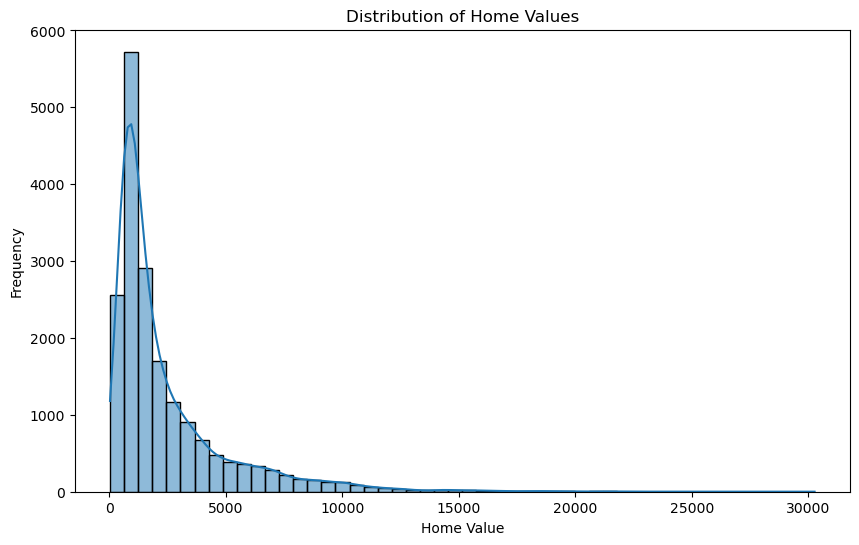

Earliest Date: 2008-02-29 00:00:00
Latest Date: 2024-10-31 00:00:00


/var/folders/qk/515s_t9x2yb29m54q37j9y780000gn/T/ipykernel_89298/2448079473.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_data['Date'] = pd.to_datetime(trend_data['Date'], errors='coerce')
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instea

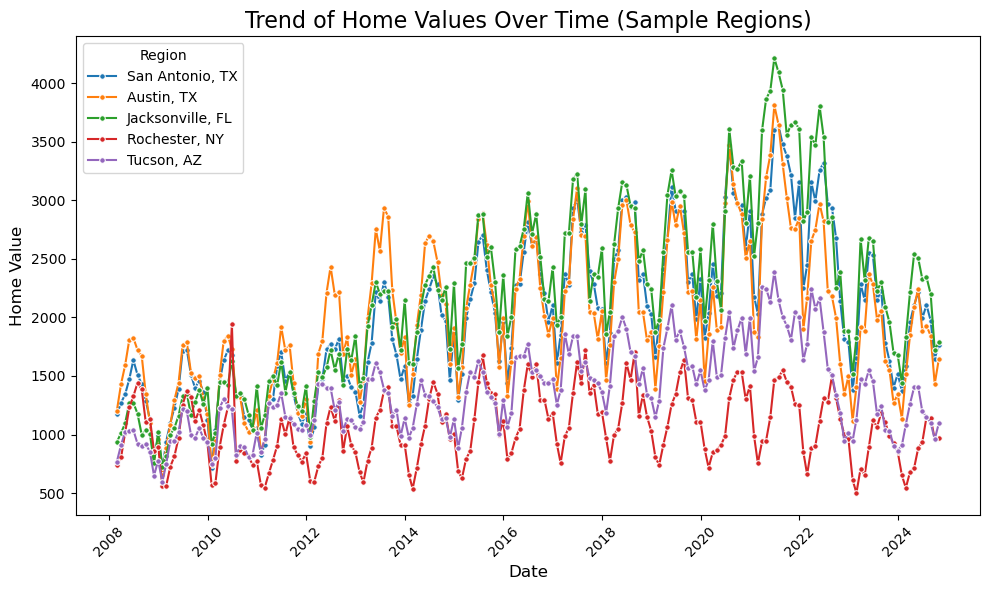

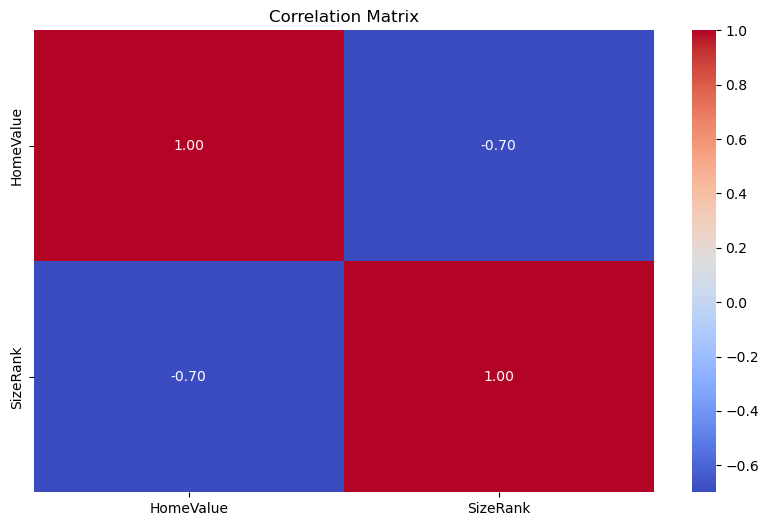

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Summary Statistics:
            RegionID      SizeRank     HomeValue  HomeValueCategory
count   18684.000000  18684.000000  18684.000000       18684.000000
mean   406365.200546     48.594733   2468.721259           0.500054
std     63470.747892     29.294600   2668.630937           0.500013
min    394304.000000      1.000000     39.000000           0.000000
25%    394514.000000     24.000000    825.750000           0.000000
50%    394843.000000     48.000000   1428.000000           1.000000
75%    395031.000000     71.000000   3029.250000           1.000000
max    753924.000000    152.000000  30266.000000           1.000000
Number of outliers detected: 1678
Lower bound: -2479.5, Upper bound: 6334.5


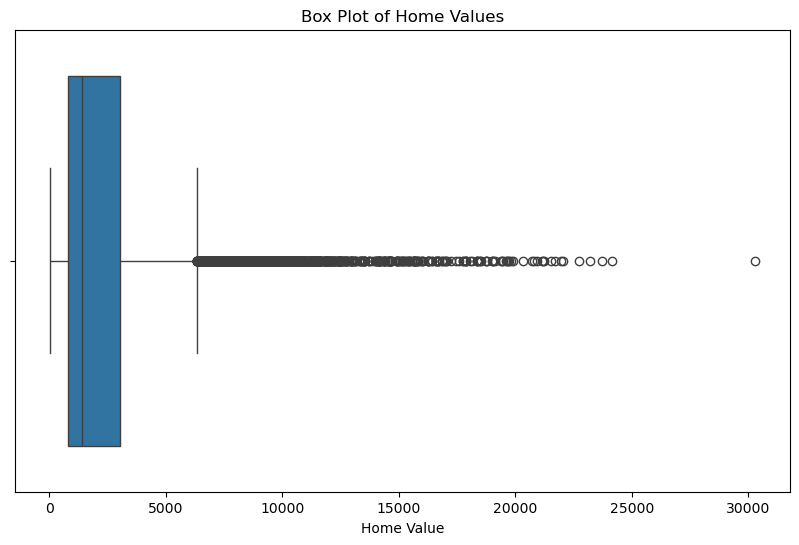

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


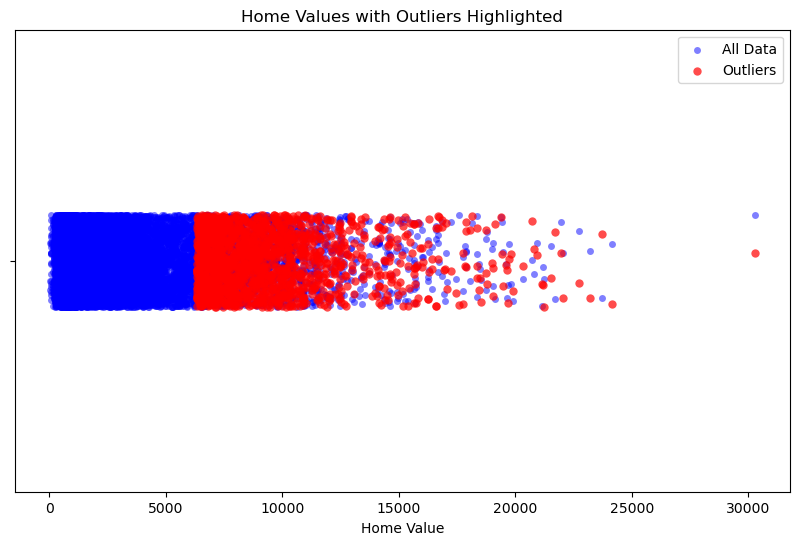

Percentage of outliers in the dataset: 8.98%


In [13]:
## Exploratory Data Analysis (EDA)

# Summary statistics for numerical columns
summary_stats = zillow_home_sales_df_cleaned.describe()

# Distribution of home values
plt.figure(figsize=(10, 6))
sns.histplot(zillow_home_sales_df_cleaned['HomeValue'], bins=50, kde=True)
plt.title('Distribution of Home Values')
plt.xlabel('Home Value')
plt.ylabel('Frequency')
plt.show()

# Trend of home values over time for a few regions (random sample of 5 regions)
sample_regions = zillow_home_sales_df_cleaned['RegionName'].sample(5, random_state=42)
trend_data = zillow_home_sales_df_cleaned[zillow_home_sales_df_cleaned['RegionName'].isin(sample_regions)]

#Add Date
trend_data['Date'] = pd.to_datetime(trend_data['Date'], errors='coerce')

# Check for the earliest and latest dates to validate the range
print("Earliest Date:", trend_data['Date'].min())
print("Latest Date:", trend_data['Date'].max())

# Plot again if dates are corrected
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_data, x='Date', y='HomeValue', hue='RegionName', marker='o', markersize=4)
plt.title('Trend of Home Values Over Time (Sample Regions)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Home Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Region')
plt.show()

# Correlation matrix heatmap for numerical features
correlation_matrix = zillow_home_sales_df_cleaned[['HomeValue', 'SizeRank']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)

# Outlier Analysis
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
 
# Detect outliers in 'HomeValue'
outliers, lower_bound, upper_bound = detect_outliers_iqr(zillow_home_sales_df_cleaned, 'HomeValue')
print(f"Number of outliers detected: {outliers.shape[0]}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
 
# Box Plot for 'HomeValue'
plt.figure(figsize=(10, 6))
sns.boxplot(data=zillow_home_sales_df_cleaned, x='HomeValue')
plt.title('Box Plot of Home Values')
plt.xlabel('Home Value')
plt.show()
 
# Highlight outliers in the data (optional visualization)
plt.figure(figsize=(10, 6))
sns.stripplot(data=zillow_home_sales_df_cleaned, x='HomeValue', color='blue', alpha=0.5, jitter=True, size=5, label='All Data')
sns.stripplot(data=outliers, x='HomeValue', color='red', alpha=0.7, jitter=True, size=6, label='Outliers')
plt.title('Home Values with Outliers Highlighted')
plt.xlabel('Home Value')
plt.legend()
plt.show()
 
# Summary of outlier statistics
outlier_percentage = (outliers.shape[0] / zillow_home_sales_df_cleaned.shape[0]) * 100
print(f"Percentage of outliers in the dataset: {outlier_percentage:.2f}%")


In [9]:
##Statistical Testing
# Hypothesis: Compare mean home values between two randomly selected regions
# Select two regions for comparison
region_1 = 'New York, NY'
region_2 = 'Los Angeles, CA'

data_region_1 = zillow_home_sales_df_cleaned[zillow_home_sales_df_cleaned['RegionName'] == region_1]['HomeValue']
data_region_2 = zillow_home_sales_df_cleaned[zillow_home_sales_df_cleaned['RegionName'] == region_2]['HomeValue']

# Perform an independent t-test
t_stat, p_value_ttest = ttest_ind(data_region_1, data_region_2, nan_policy='omit')

# Hypothesis 2: Chi-squared test on size rank frequency between two states
state_data = zillow_home_sales_df_cleaned[zillow_home_sales_df_cleaned['StateName'].notnull()]

# Frequency table of SizeRank by StateName
contingency_table = pd.crosstab(state_data['StateName'], state_data['SizeRank'])

# Perform Chi-squared test
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

# Display results
results = {
    "T-Test": {
        "Regions": (region_1, region_2),
        "t_stat": t_stat,
        "p_value": p_value_ttest
    },
    "Chi-Squared Test": {
        "Chi2_stat": chi2_stat,
        "p_value": p_value_chi2,
        "degrees_of_freedom": dof
    }
}

print("Statistical Test Results:")
print(results)

Statistical Test Results:
{'T-Test': {'Regions': ('New York, NY', 'Los Angeles, CA'), 't_stat': 16.970123938805145, 'p_value': 4.835553424864416e-49}, 'Chi-Squared Test': {'Chi2_stat': 691307.9999999999, 'p_value': 0.0, 'degrees_of_freedom': 3404}}


In [10]:
## Statistical Models: Linear Regression and ANOVA

# Load or prepare cleaned subset for analysis
clean_subset = zillow_home_sales_df_cleaned[['SizeRank', 'HomeValue']].dropna()

# Fit linear regression model
X = sm.add_constant(clean_subset['SizeRank'])
y = clean_subset['HomeValue']
linear_model = sm.OLS(y, X).fit()

# Print linear regression summary
print(linear_model.summary())

# ANOVA model fitting
anova_model = ols('HomeValue ~ SizeRank', data=clean_subset).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)

# Print ANOVA results
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:              HomeValue   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.787e+04
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:54:44   Log-Likelihood:            -1.6765e+05
No. Observations:               18684   AIC:                         3.353e+05
Df Residuals:                   18682   BIC:                         3.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5563.8151     27.038    205.781      0.0

In [11]:
## Statistical Models: Logistic Regression and Decision Tree Modeling
# Ensure the binary target column 'HomeValueCategory' is created
zillow_home_sales_df_cleaned.loc[:, 'HomeValueCategory'] = np.where(
    zillow_home_sales_df_cleaned['HomeValue'] >= zillow_home_sales_df_cleaned['HomeValue'].median(), 1, 0
)

# Prepare features and target
X_classification = zillow_home_sales_df_cleaned[['SizeRank']]
y_classification = zillow_home_sales_df_cleaned['HomeValueCategory']

# Split data into training and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_cls, y_train_cls)
y_pred_logistic = logistic_model.predict(X_test_cls)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_cls, y_train_cls)
y_pred_tree = tree_model.predict(X_test_cls)

# Logistic Regression Evaluation
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_logistic)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_cls, y_pred_logistic)}")
print(f"Classification Report:\n{classification_report(y_test_cls, y_pred_logistic)}")

# Decision Tree Evaluation
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_tree)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test_cls, y_pred_tree)}")
print(f"Classification Report:\n{classification_report(y_test_cls, y_pred_tree)}")


Logistic Regression Results:
Accuracy: 0.8696815627508697
Confusion Matrix:
[[1610  244]
 [ 243 1640]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1854
           1       0.87      0.87      0.87      1883

    accuracy                           0.87      3737
   macro avg       0.87      0.87      0.87      3737
weighted avg       0.87      0.87      0.87      3737


Decision Tree Results:
Accuracy: 0.8996521273748996
Confusion Matrix:
[[1665  189]
 [ 186 1697]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1854
           1       0.90      0.90      0.90      1883

    accuracy                           0.90      3737
   macro avg       0.90      0.90      0.90      3737
weighted avg       0.90      0.90      0.90      3737



/var/folders/qk/515s_t9x2yb29m54q37j9y780000gn/T/ipykernel_89298/3876445667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_home_sales_df_cleaned.loc[:, 'HomeValueCategory'] = np.where(
